In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [2]:
data = {
    'CustomerID': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Gender': ['Male', 'Male', 'Female', 'Female', 'Female', 'Male', 'Male', 'Female', 'Female', 'Male'],
    'Age': [19, 21, 20, 23, 31, 22, 35, 23, 64, 30],
    'Annual Income (k$)': [15, 15, 16, 16, 17, 17, 18, 18, 19, 19],
    'Spending Score (1-100)': [39, 81, 6, 77, 40, 76, 6, 94, 3, 72]
}

df = pd.DataFrame(data)

In [3]:
print("First 5 rows:")
print(df.head())

First 5 rows:
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [4]:
print("\nLast 5 rows:")
print(df.tail())


Last 5 rows:
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
5           6    Male   22                  17                      76
6           7    Male   35                  18                       6
7           8  Female   23                  18                      94
8           9  Female   64                  19                       3
9          10    Male   30                  19                      72


In [5]:
features = ['Annual Income (k$)', 'Spending Score (1-100)']
X = df[features]

In [6]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [8]:
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

C:\Users\nikit\des\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\nikit\des\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\nikit\des\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\nikit\des\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THRE

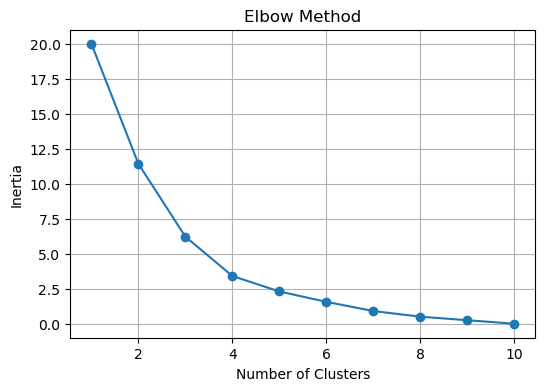

In [9]:
plt.figure(figsize=(6, 4))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

In [10]:
k = 5
kmeans = KMeans(n_clusters=k, random_state=0)
df['Cluster'] = kmeans.fit_predict(X_scaled)

C:\Users\nikit\des\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\nikit\des\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


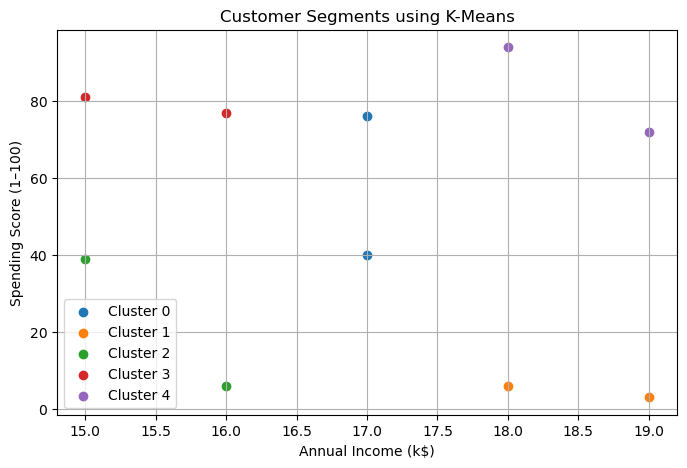

In [13]:
plt.figure(figsize=(8, 5))
for cluster in range(k):
    cluster_points = df[df['Cluster'] == cluster]
    plt.scatter(cluster_points['Annual Income (k$)'], cluster_points['Spending Score (1-100)'], label=f'Cluster {cluster}')
    plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1–100)')
plt.title('Customer Segments using K-Means')
plt.legend()
plt.grid(True)
plt.show()

    

In [14]:
print("\nClustered Data:")
print(df[['CustomerID', 'Annual Income (k$)', 'Spending Score (1-100)', 'Cluster']])


Clustered Data:
   CustomerID  Annual Income (k$)  Spending Score (1-100)  Cluster
0           1                  15                      39        2
1           2                  15                      81        3
2           3                  16                       6        2
3           4                  16                      77        3
4           5                  17                      40        0
5           6                  17                      76        0
6           7                  18                       6        1
7           8                  18                      94        4
8           9                  19                       3        1
9          10                  19                      72        4
